In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
#Load both datasets
recent_grads_df = pd.read_csv('grad-students.csv')
software_dev_df = pd.read_csv('SofwareDeveloperIncomeExpensesperUSACity.csv')
salary_trends_df = pd.read_csv('Software_Engineer_Salaries_Employment_2012-2023.csv')
all_ages = pd.read_csv('all-ages.csv')

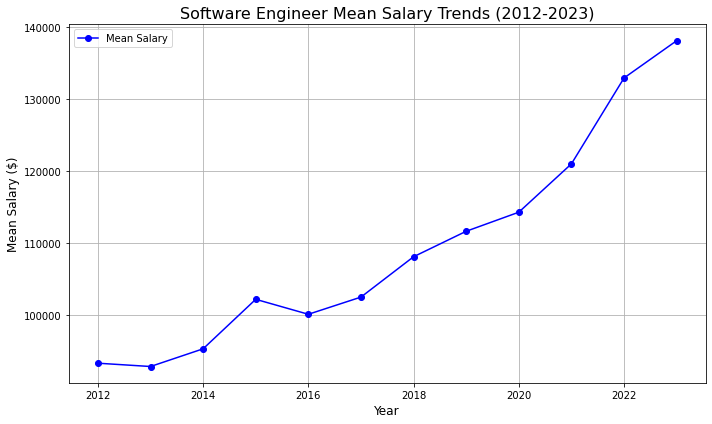

In [3]:
#1. Question: How have software engineer salaries (mean) changed between 2012 and 2023?
#
#   Visualization: A line chart with years on the x-axis and 
#   salary ($) on the y-axis.one line representing the mean salary trend from 2012 to 2023.
#
#   Purpose: Show long-term trends and fluctuations in software engineer salaries. 
#   Discuss any observed patterns (e.g., steady growth, fluctuations).
#
#
#Extract relevant columns (Year and Mean Salary)
salary_trends = salary_trends_df[['Year', 'Mean Salary']]

plt.figure(figsize=(10, 6))

#Plot the mean salary trend over the years
plt.plot(salary_trends['Year'], salary_trends['Mean Salary'], marker='o', color='b', label='Mean Salary')

#Title and labels
plt.title('Software Engineer Mean Salary Trends (2012-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Salary ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.legend(loc='upper left')
plt.show()

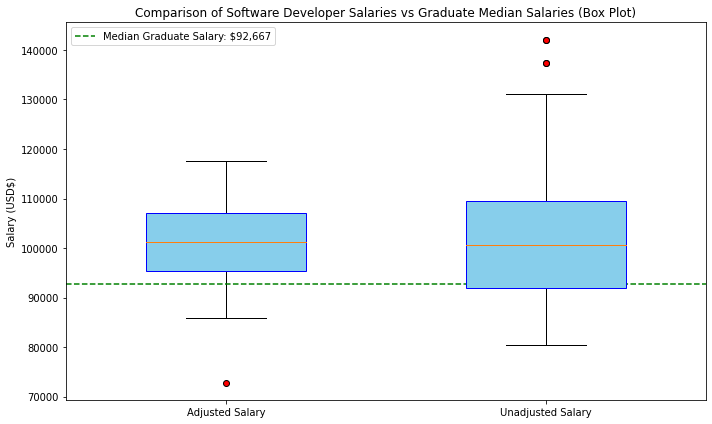

In [4]:
#2. Question: How do software developer salaries
#   (adjusted and unadjusted) compare with the median salary of software engineering graduates?
#
#   Visualization: Box plot comparing adjusted and unadjusted salaries against a horizontal line 
#   for the graduate median salary.
#
#   Purpose: Highlight disparities between graduate expectations and industry norms.


#Filter for relevant majors in grad-students.csv
filtered_data = recent_grads_df[recent_grads_df['Major'].isin([
    'COMPUTER PROGRAMMING AND DATA PROCESSING', 
    'COMPUTER SCIENCE', 
    'MATHEMATICS AND COMPUTER SCIENCE'
])]

#Calculate the median salary for software engineering graduates
median_graduate_salary = filtered_data['Grad_median'].mean()

#Extract relevant columns for software developer salaries
adjusted_salary = software_dev_df['Mean Software Developer Salary (adjusted)']
unadjusted_salary = software_dev_df['Mean Software Developer Salary (unadjusted)']

plt.figure(figsize=(10, 6))

#Create a box plot 
plt.boxplot([adjusted_salary, unadjusted_salary], positions=[1, 2], widths=0.5, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=6))

#horizontal line for the median graduate salary
plt.axhline(y=median_graduate_salary, color='green', linestyle='--', label=f'Median Graduate Salary: ${median_graduate_salary:,.0f}')

#Set labels and title
plt.xticks([1, 2], ['Adjusted Salary', 'Unadjusted Salary'])
plt.title('Comparison of Software Developer Salaries vs Graduate Median Salaries (Box Plot)')
plt.ylabel('Salary (USD$)')
plt.legend()
plt.tight_layout()
plt.show()

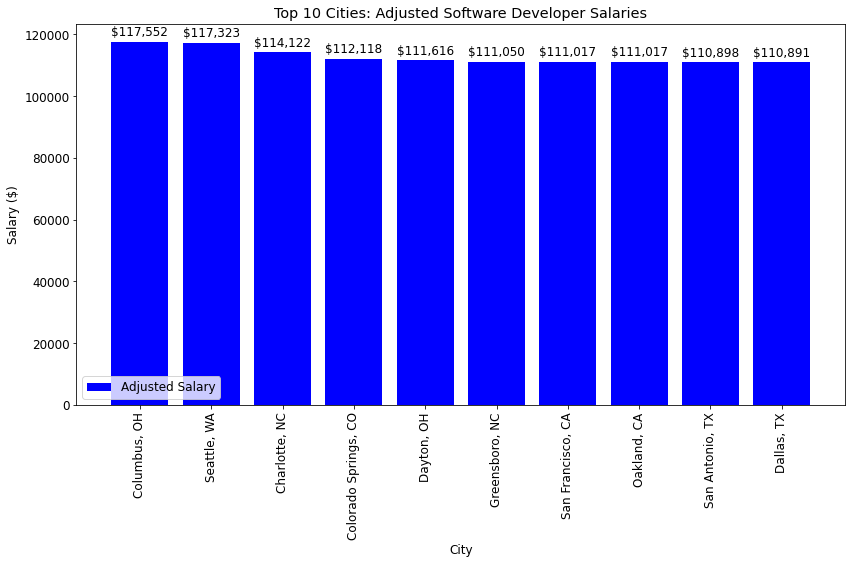

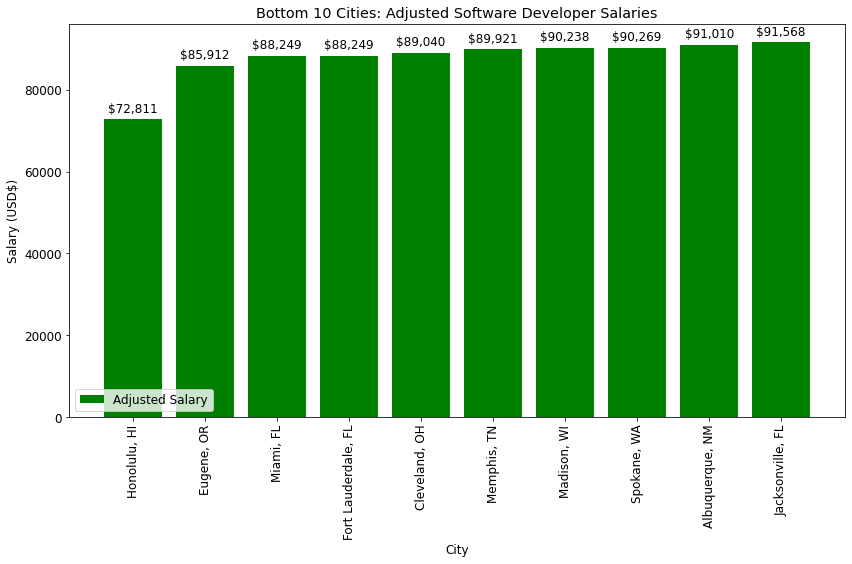

In [5]:
#3. Question: How do adjusted and unadjusted salaries compare across cities?
#
#   Visualization: Bar plot comparing "Mean Software Developer Salary (adjusted)" and "Mean Software Developer Salary (unadjusted)" for each city.
#
#   Purpose: this comparison provides valuable insights into the location-based variations in the software engineering field.
#
#
#
#Sort the cities by adjusted salary in descending order
software_dev_df_sorted = software_dev_df.sort_values(by='Mean Software Developer Salary (adjusted)', ascending=False)

#Top 10 cities
top_10_cities = software_dev_df_sorted.head(10)

#Bottom 10 cities (sorted in ascending order)
bottom_10_cities = software_dev_df_sorted.tail(10).sort_values(by='Mean Software Developer Salary (adjusted)', ascending=True)


plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12, 8))

#Bar plot for top 10 cities
x_top = range(len(top_10_cities))

#plot adjusted salaries for top 10 cities
bars_top = plt.bar(x_top, top_10_cities['Mean Software Developer Salary (adjusted)'], color='blue', label='Adjusted Salary')

#Add the values to the bars
for bar in bars_top:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, f'${height:,.0f}', ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Salary ($)')
plt.title('Top 10 Cities: Adjusted Software Developer Salaries')
plt.xticks([i for i in x_top], top_10_cities['City'], rotation=90)
plt.legend(loc='lower left')  # Move legend to the bottom left
plt.tight_layout()

#Show the plot for top 10 cities
plt.show()

plt.figure(figsize=(12, 8))

#Bar plot for bottom 10 cities
x_bottom = range(len(bottom_10_cities))

#Plot salaries for bottom 10 cities
bars_bottom = plt.bar(x_bottom, bottom_10_cities['Mean Software Developer Salary (adjusted)'], color='green', label='Adjusted Salary')

#Add the values to the bars
for bar in bars_bottom:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1000, f'${height:,.0f}', ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Salary (USD$)')
plt.title('Bottom 10 Cities: Adjusted Software Developer Salaries')
plt.xticks([i for i in x_bottom], bottom_10_cities['City'], rotation=90)
plt.legend(loc='lower left')  # Move legend to the bottom left
plt.tight_layout()

# Show the plot for bottom 10 cities
plt.show()

In [6]:
#Merge datasets on 'Major'
merged_data = pd.merge(all_ages, recent_grads_df, on='Major', suffixes=('_all', '_grad'))

#Check if 'Index' or 'Grad_Index' are present and drop them if they exist
if 'Index' in merged_data.columns or 'Grad_Index' in merged_data.columns:
    merged_data = merged_data.drop(columns=['Index', 'Grad_Index'])

#relevant columns
merged_data = merged_data[['Major', 
                           'Employed', 
                           'Median', 
                           'Grad_employed', 
                           'Grad_median', 
                           'Grad_unemployment_rate', 
                           'Nongrad_median',
                           'Nongrad_employed']]

#rename columns
merged_data = merged_data.rename(columns={
    'Employed_all': 'Employed',
    'Median_all': 'Median',
    'Employed_grad': 'Grad_employed',
    'Median_grad': 'Grad_median',
    'Unemployment_rate_grad': 'Grad_unemployment_rate',
    'Median_nongrad': 'Nongrad_median', 
    'Employed_nongrad': 'Nongrad_employed'
})

#Drop rows with missing values
merged_data = merged_data.dropna()

#Filter for relevant majors
filtered_data = merged_data[merged_data['Major'].isin(['COMPUTER PROGRAMMING AND DATA PROCESSING', 
                                                       'COMPUTER SCIENCE', 
                                                       'MATHEMATICS AND COMPUTER SCIENCE'])]

#print
print(filtered_data.head())

                                       Major  Employed  Median  Grad_employed  \
19  COMPUTER PROGRAMMING AND DATA PROCESSING     22828   60000           4716   
20                          COMPUTER SCIENCE    656372   78000         281088   
97          MATHEMATICS AND COMPUTER SCIENCE      5874   92000           3880   

    Grad_median  Grad_unemployment_rate  Nongrad_median  Nongrad_employed  
19      85000.0                0.024612         60000.0             22024  
20      95000.0                0.036198         80000.0            623930  
97      98000.0                0.102890         92000.0              5711  


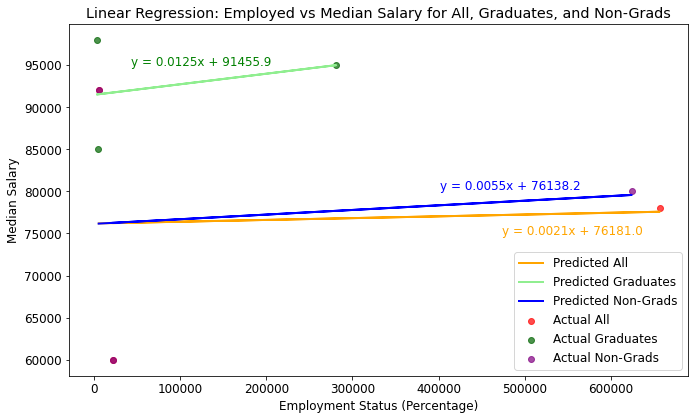

Employed All Model: MSE = 171140978.0694839, R-squared = 0.002416578610521136
Employed Graduates Model: MSE = 28212300.762590498, R-squared = 0.08665213358519963
Employed Non-Grads Model: MSE = 171717388.8739227, R-squared = 0.014377232228760084


In [7]:
#4. Question:  How does the employment status of computer science graduates, non-graduates,
#   and the general workforce correlate with median salaries across different sectors?
#
#   Visualization: Linear Regression: Employed vs Median Salary for All, Graduates, and Non-Grads
#
#   Purpose: shows how employment rates (for all workers, graduates, and non-graduates) influence median salaries within the computer science field. By analyzing trends in these groups, we can identify the impact of higher education on earning potential,
#

#Linear Regression for Employed All vs Median Salary
X_all = filtered_data[['Employed']]  #Feature: Employed_all
y_all = filtered_data['Median']     #Target: Median_all
#Train Linear Regression Model
model_all = LinearRegression()
model_all.fit(X_all, y_all)
#Make Predictions
y_all_pred = model_all.predict(X_all)

#Linear Regression for Employed Graduates vs Median Salary
X_grad = filtered_data[['Grad_employed']]  #Feature: Employed_grad
y_grad = filtered_data['Grad_median']     #Target: Median_grad
#Train Linear Regression Model
model_grad = LinearRegression()
model_grad.fit(X_grad, y_grad)
#Make Predictions
y_grad_pred = model_grad.predict(X_grad)

#Linear Regression for Employed Non-Grads vs Median Salary
X_nongrad = filtered_data[['Nongrad_employed']]  #Feature: Employed_nongrad
y_nongrad = filtered_data['Nongrad_median']     #Target: Median_nongrad
#Train Linear Regression Model
model_nongrad = LinearRegression()
model_nongrad.fit(X_nongrad, y_nongrad)
#Make Predictions
y_nongrad_pred = model_nongrad.predict(X_nongrad)

plt.figure(figsize=(10, 6))

#Employed All vs Median Salary
plt.scatter(X_all, y_all, color="red", label="Actual All", alpha=0.7)
plt.plot(X_all, y_all_pred, color="orange", label="Predicted All", linewidth=2)
#Equation for Employed All: y = mx + b
slope_all = model_all.coef_[0]  #coefficient (slope)
intercept_all = model_all.intercept_  #Intercept (y-intercept)
equation_all = f"y = {slope_all:.4f}x + {intercept_all:.1f}"
#Add equation label for Employed All
plt.text(0.7, 0.4, equation_all, transform=plt.gca().transAxes, color="orange", fontsize=12, ha='left')

#Plot for Employed Graduates vs Median Salary
plt.scatter(X_grad, y_grad, color="darkgreen", label="Actual Graduates", alpha=0.7)
plt.plot(X_grad, y_grad_pred, color="lightgreen", label="Predicted Graduates", linewidth=2)
#Equation for Employed Graduates: y = mx + b
slope_grad = model_grad.coef_[0]  #Coefficient (slope)
intercept_grad = model_grad.intercept_  #Intercept (y-intercept)
equation_grad = f"y = {slope_grad:.4f}x + {intercept_grad:.1f}"
#Add equation label for Employed Graduates
plt.text(0.1, 0.88, equation_grad, transform=plt.gca().transAxes, color="green", fontsize=12, ha='left')

#Plot for Employed Non-Grads vs Median Salary
plt.scatter(X_nongrad, y_nongrad, color="purple", label="Actual Non-Grads", alpha=0.7)
plt.plot(X_nongrad, y_nongrad_pred, color="blue", label="Predicted Non-Grads", linewidth=2)

#Equation for Employed Non-Grads: y = mx + b
slope_nongrad = model_nongrad.coef_[0]  # Coefficient (slope)
intercept_nongrad = model_nongrad.intercept_  # Intercept (y-intercept)
equation_nongrad = f"y = {slope_nongrad:.4f}x + {intercept_nongrad:.1f}"
#Add equation label for Employed Non-Grads
plt.text(0.6, 0.53, equation_nongrad, transform=plt.gca().transAxes, color="blue", fontsize=12, ha='left')
#Titles and Labels
plt.title("Linear Regression: Employed vs Median Salary for All, Graduates, and Non-Grads")
plt.xlabel("Employment Status (Percentage)")
plt.ylabel("Median Salary")

#Move legend to the bottom right
plt.legend(loc='lower right')

#Show plot
plt.tight_layout()
plt.show()

#Print Evaluation Metrics for All, Graduates, and Non-Grads
print(f"Employed All Model: MSE = {mean_squared_error(y_all, y_all_pred)}, R-squared = {r2_score(y_all, y_all_pred)}")
print(f"Employed Graduates Model: MSE = {mean_squared_error(y_grad, y_grad_pred)}, R-squared = {r2_score(y_grad, y_grad_pred)}")
print(f"Employed Non-Grads Model: MSE = {mean_squared_error(y_nongrad, y_nongrad_pred)}, R-squared = {r2_score(y_nongrad, y_nongrad_pred)}")